In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('data.json', 'r') as file: 
    json_data = json.load(file)

In [ ]:
print(json.dumps(json_data, indent=4))

In [4]:
print(json_data.keys())

dict_keys(['cpu_used', 'ipc', 'flops_any', 'mem_bw', 'net_bw', 'mem_used', 'acc_used', 'acc_mem_used', 'acc_power', 'acc_temp', 'filesystems'])


In [5]:
print(json_data['acc_used'].keys())  # Inspect keys within 'cpu_used'

dict_keys(['accelerator'])


In [13]:
print(json_data['cpu_used'].keys())  # Inspect keys within 'cpu_used'

dict_keys(['core'])


In [ ]:
acc_mem_used = json_data['acc_mem_used']
acc_temp = json_data['acc_temp']
acc_power = json_data['acc_power']
acc_used = json_data['acc_used']

print(json.dumps(acc_mem_used, indent=4))
#print(json.dumps(acc_temp, indent=4))
#print(json.dumps(acc_power, indent=4))
#print(json.dumps(acc_used, indent=4))

{
    "accelerator": {
        "unit": {
            "base": "B"
        },
        "timestep": "30",
        "series": [
            {
                "hostname": "i8010",
                "id": "4",
                "statistics": {
                    "min": 538771456,
                    "avg": 5245517286.01791,
                    "max": 8353611776
                },
                "data": [
                    538771456,
                    542179328,
                    7143555072,
                    7529431040,
                    8353611776,
                    8353611776,
                    8353611776,
                    542179328,
                    7143555072,
                    7529431040,
                    7529431040,
                    7529431040,
                    8276017152,
                    8276017152,
                    8276017152,
                    8276017152,
                    8276017152,
                    8276017152,
                    827601715

In [15]:
cpu_used = json_data['cpu_used']

print(json.dumps(cpu_used, indent=4))

{
    "core": {
        "unit": {
            "base": "load"
        },
        "timestep": "30",
        "series": [
            {
                "hostname": "i8010",
                "id": "24",
                "statistics": {
                    "min": 0,
                    "avg": 0.13244742490184944,
                    "max": 0.5631886960391633
                },
                "data": [
                    0.003332611351771632,
                    0.057292555932669444,
                    0.1539660455328325,
                    0.08401434289526351,
                    0.11701009993251407,
                    0.1321011425659872,
                    0.12677141785717513,
                    0.1580036131629921,
                    0.10683803042930622,
                    0.13076251795965643,
                    0.16620681083768335,
                    0.10959204186405001,
                    0.11878096427231397,
                    0.18642527859863833,
                    0.1518856

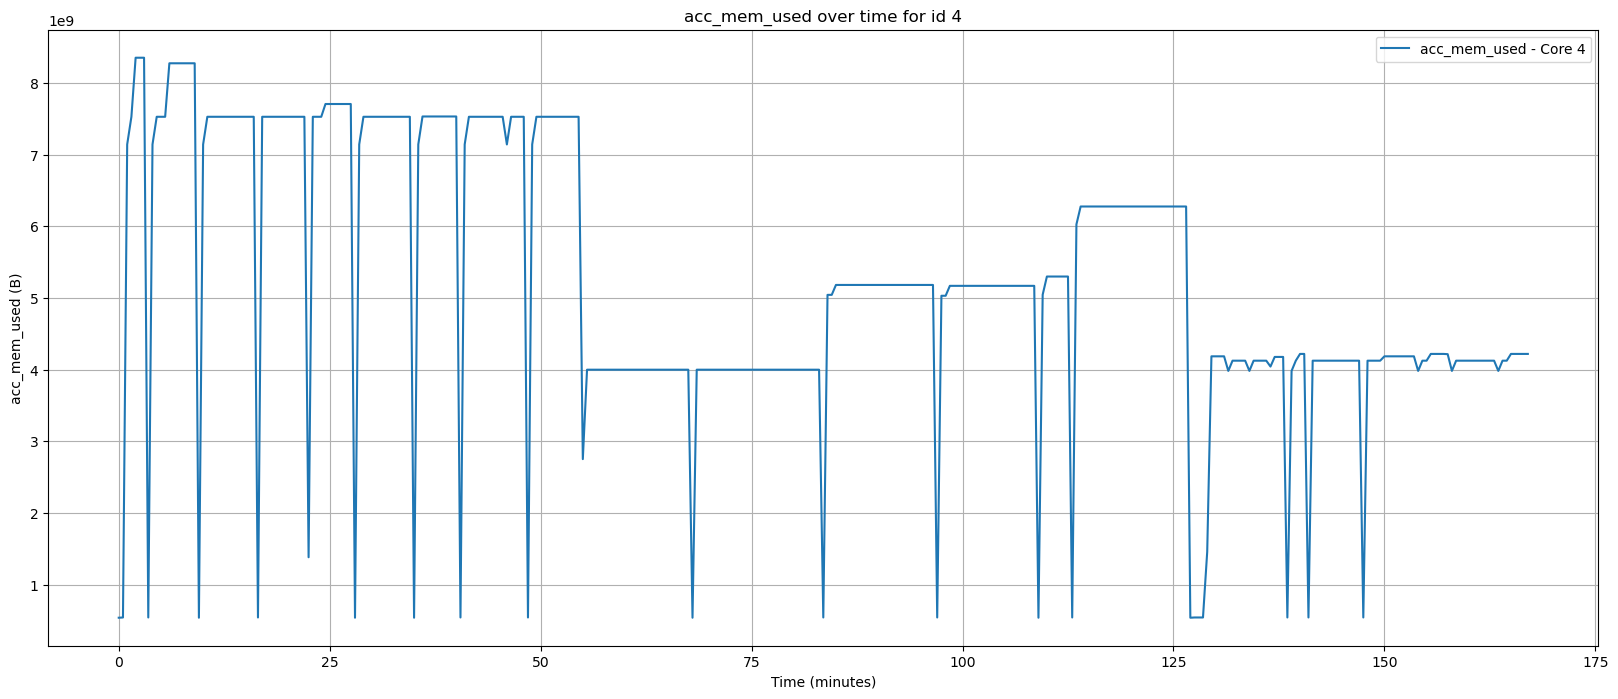

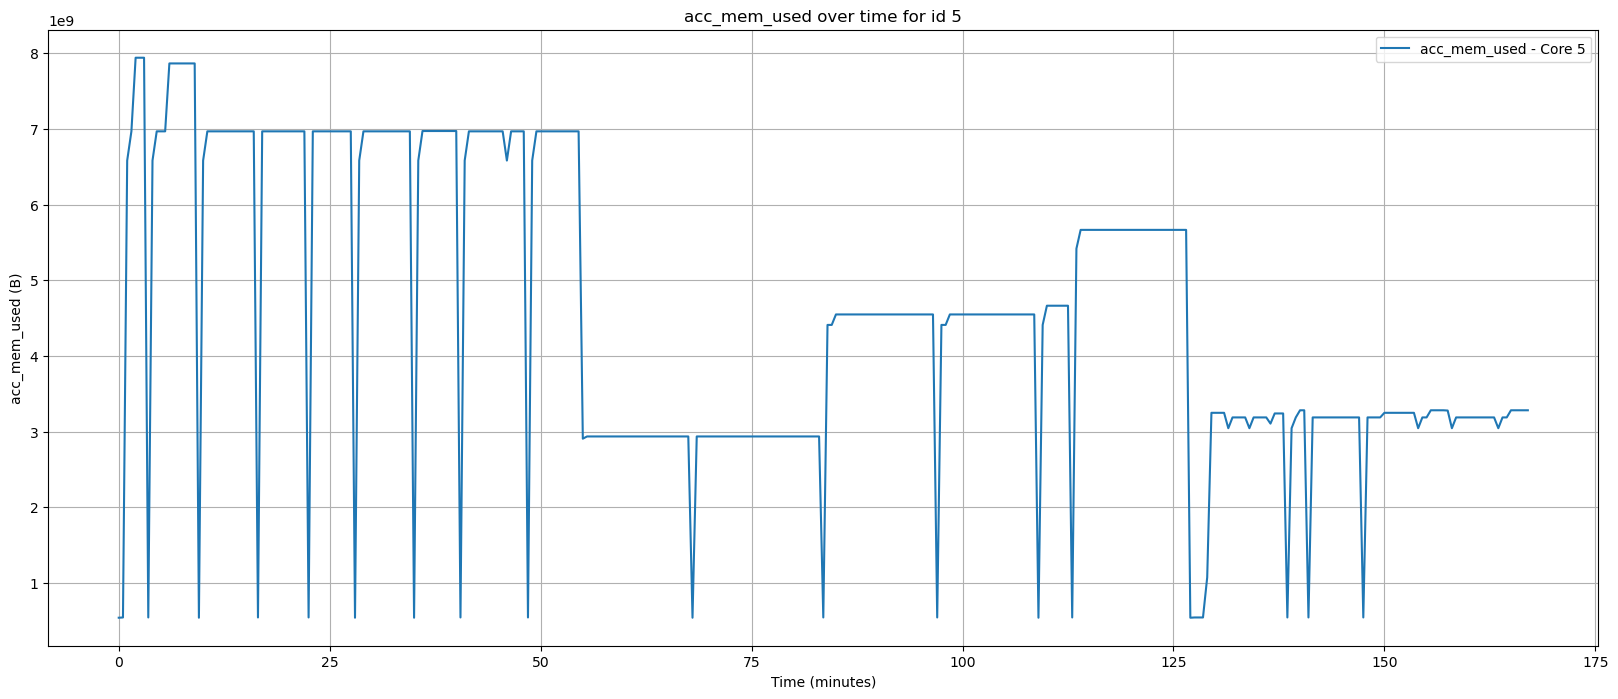

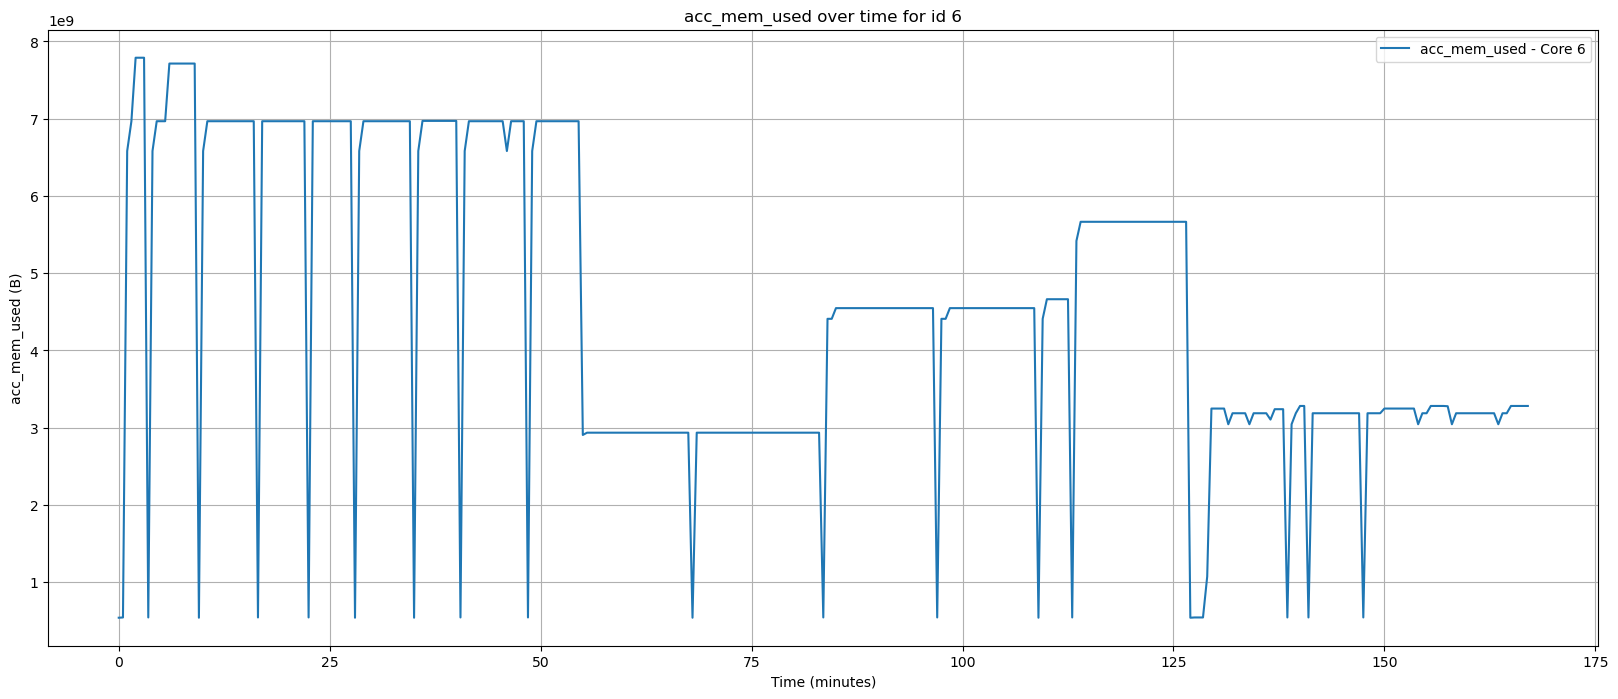

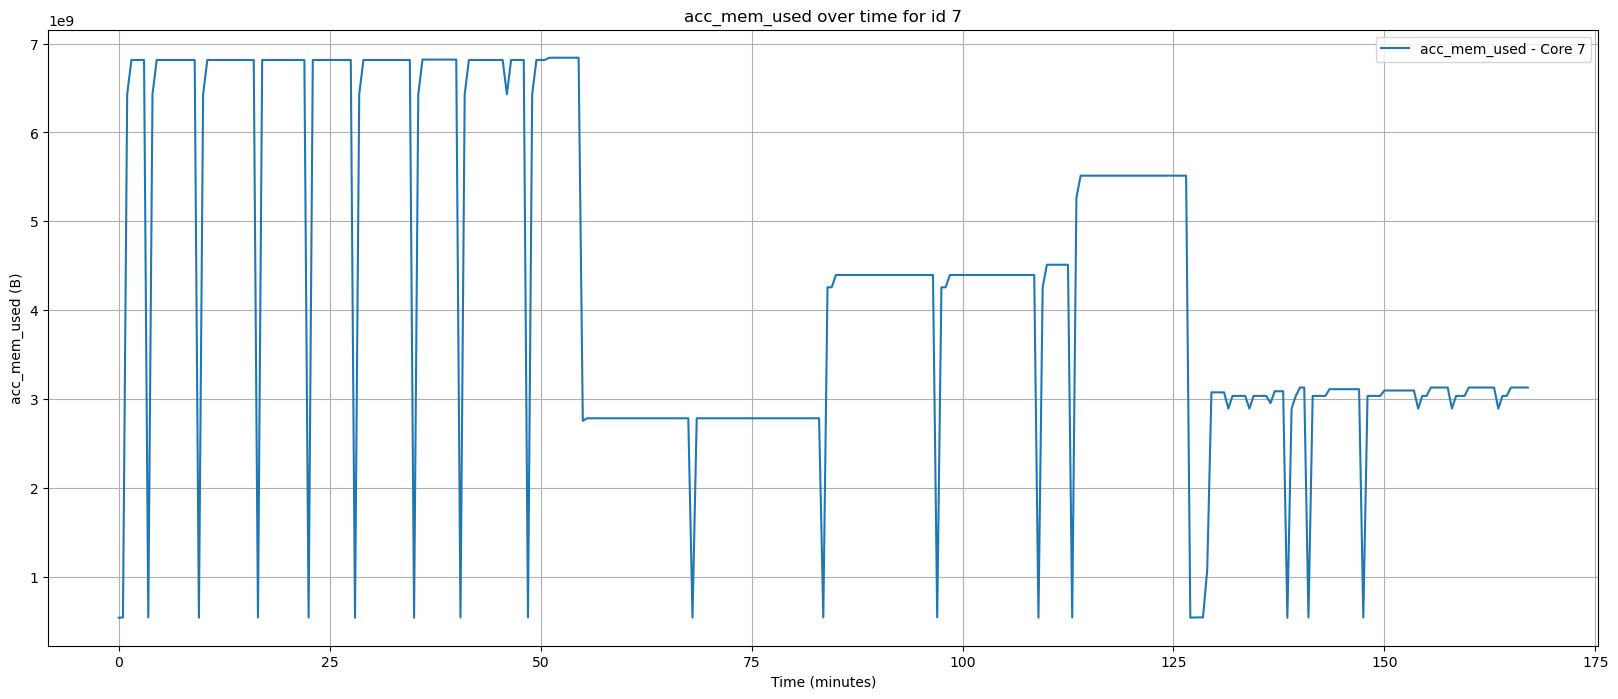

No data found for ID 8 in metric 'acc_mem_used'.


In [ ]:
# Function to plot data for a specific metric and core/accelerator ID
def plot_metric(data, metric, target_id, time_unit="minutes"):
    # Ensure the metric exists in the JSON data
    if metric not in data:
        print(f"Metric '{metric}' not found in the data.")
        return

    # Get the relevant data for the metric
    metric_data = data[metric]
    timestep = int(metric_data["accelerator"]["timestep"])  # Get timestep in seconds
    unit = metric_data["accelerator"]["unit"]["base"]  # Confirm temperature unit (e.g., °C)

    
    # Find the series for the specified target_id
    series = None
    for entry in metric_data["accelerator"]["series"]:
        if entry["id"] == target_id:
            series = entry
            break
    
    if series is None:
        print(f"No data found for ID {target_id} in metric '{metric}'.")
        return

    # Extract data and time points
    values = series["data"]
    time = np.arange(0, len(values) * timestep, timestep)

    # Convert time to minutes if needed
    if time_unit == "minutes":
        time = time / 60
        time_label = "Time (minutes)"
    else:
        time_label = "Time (seconds)"

    # Plotting
    plt.figure(figsize=(20, 8))
    plt.plot(time, values, linestyle='-', label=f"{metric} - Core {series['id']}")
    plt.xlabel("Time (minutes)")
    plt.ylabel(f"{metric} ({unit})")
    plt.title(f"{metric} over time for id {target_id}")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_metric(json_data, 'acc_mem_used', target_id="4")
plot_metric(json_data, 'acc_mem_used', target_id="5")
plot_metric(json_data, 'acc_mem_used', target_id="6")
plot_metric(json_data, 'acc_mem_used', target_id="7")
#plot_metric(json_data, 'acc_temp', target_id="4")


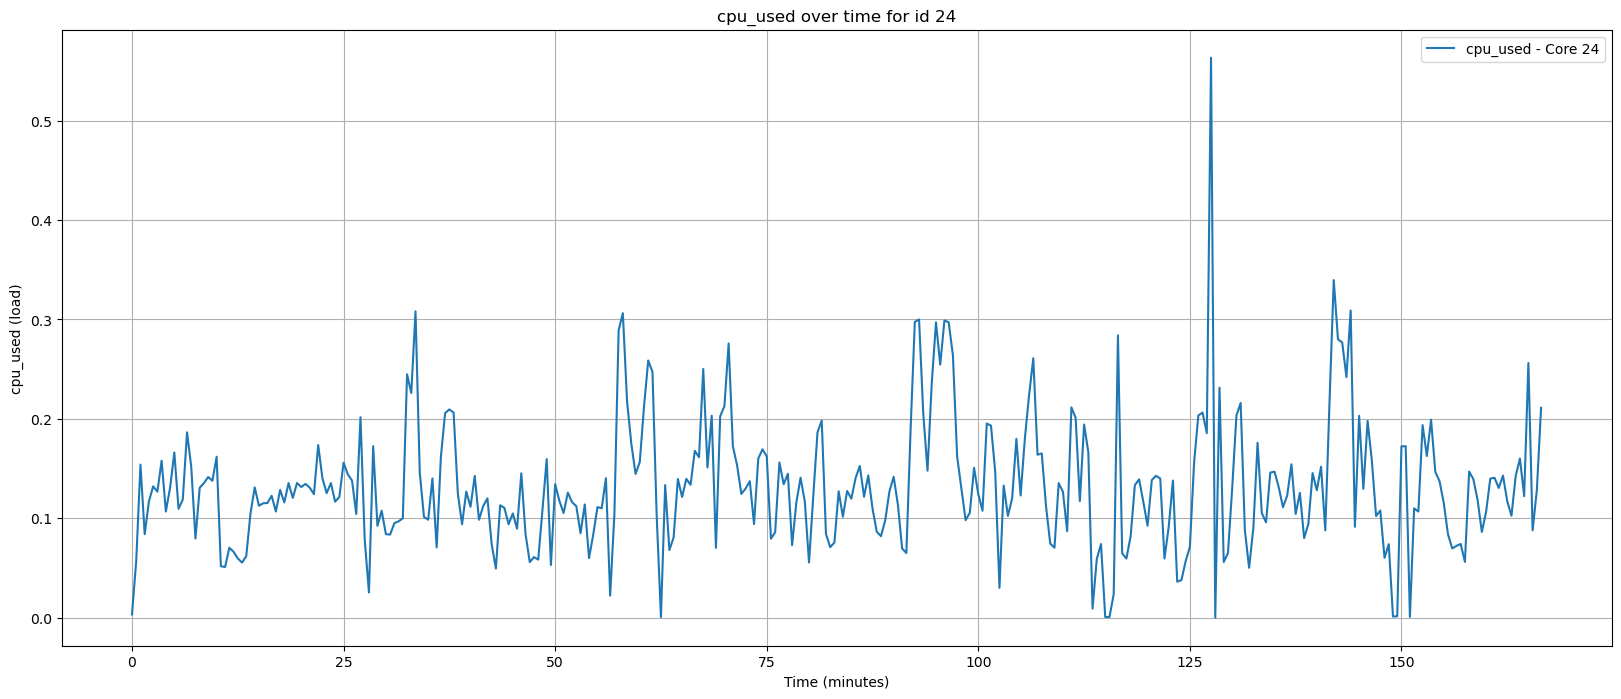

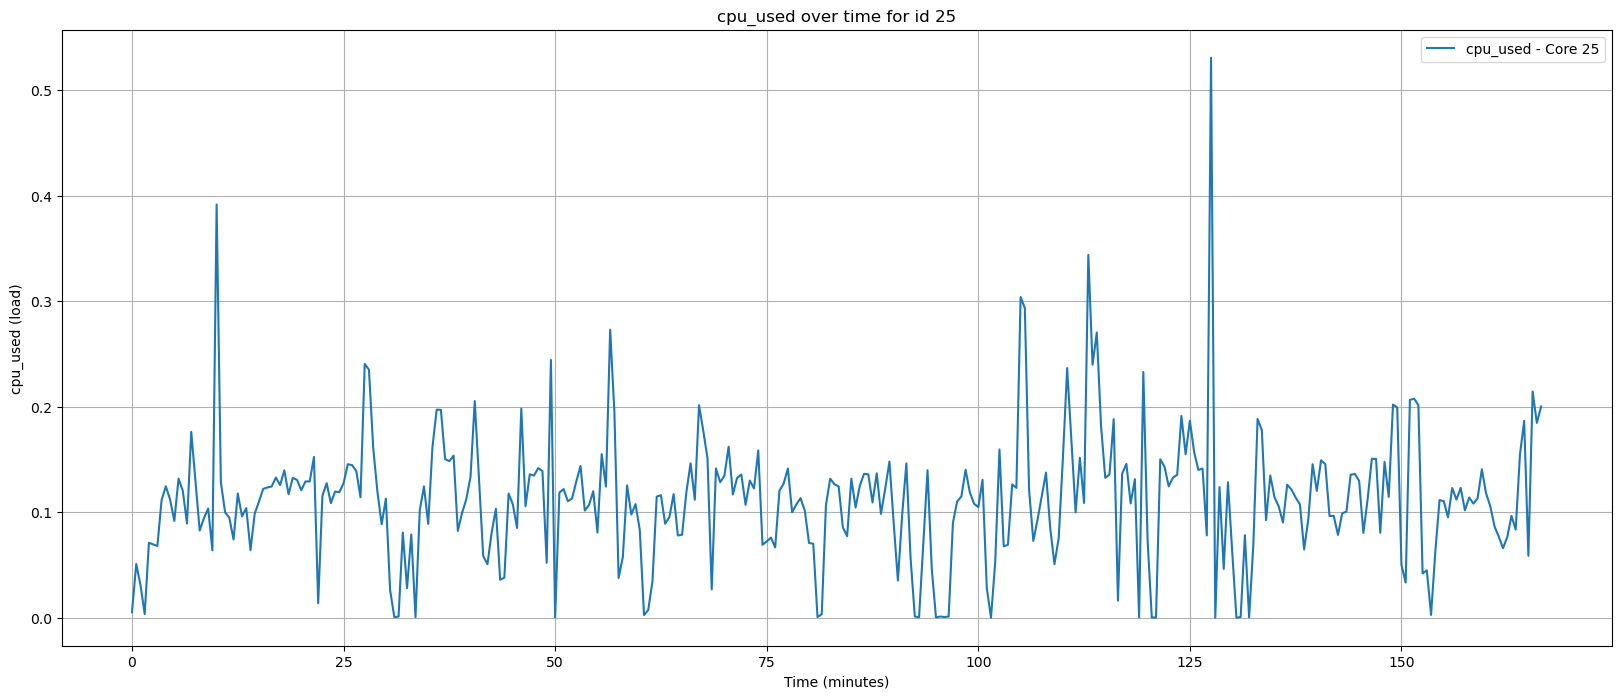

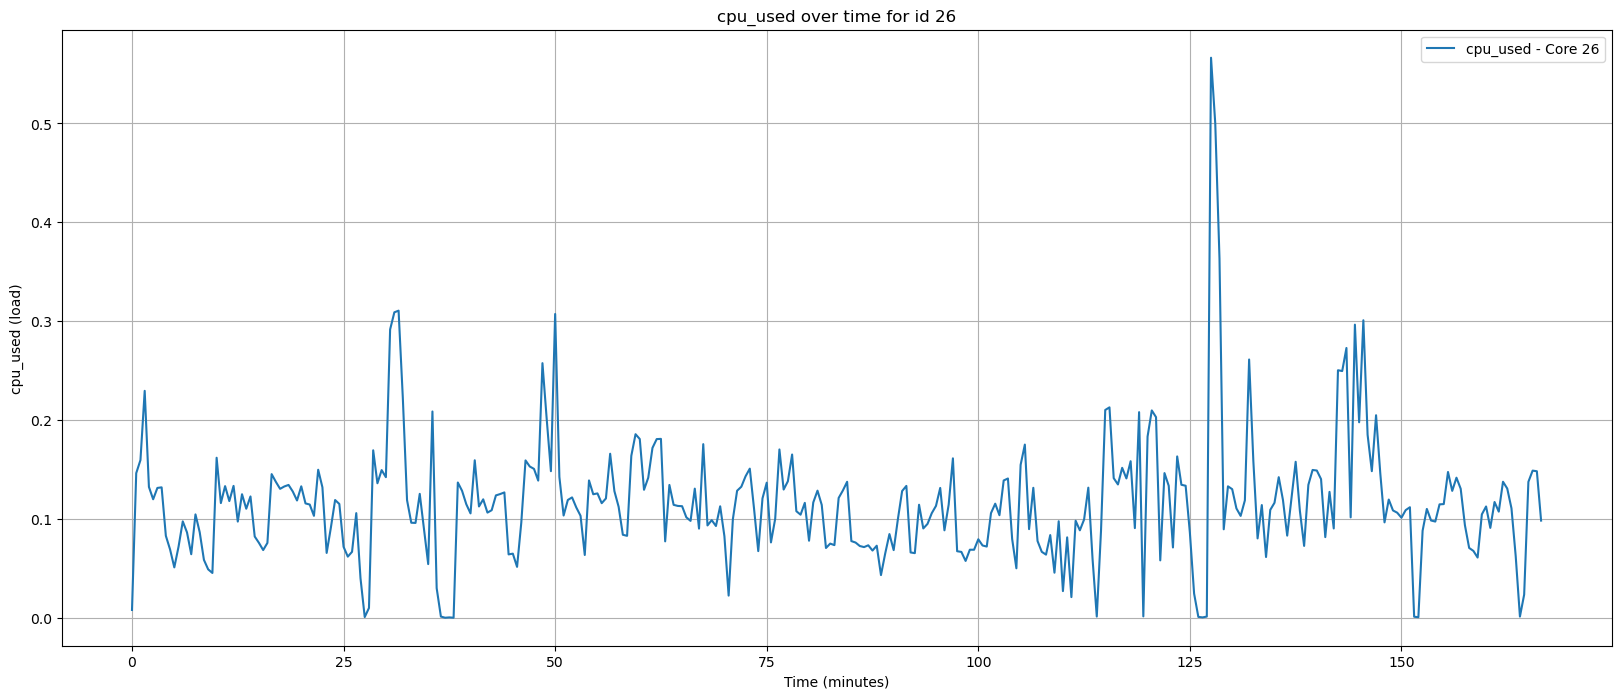

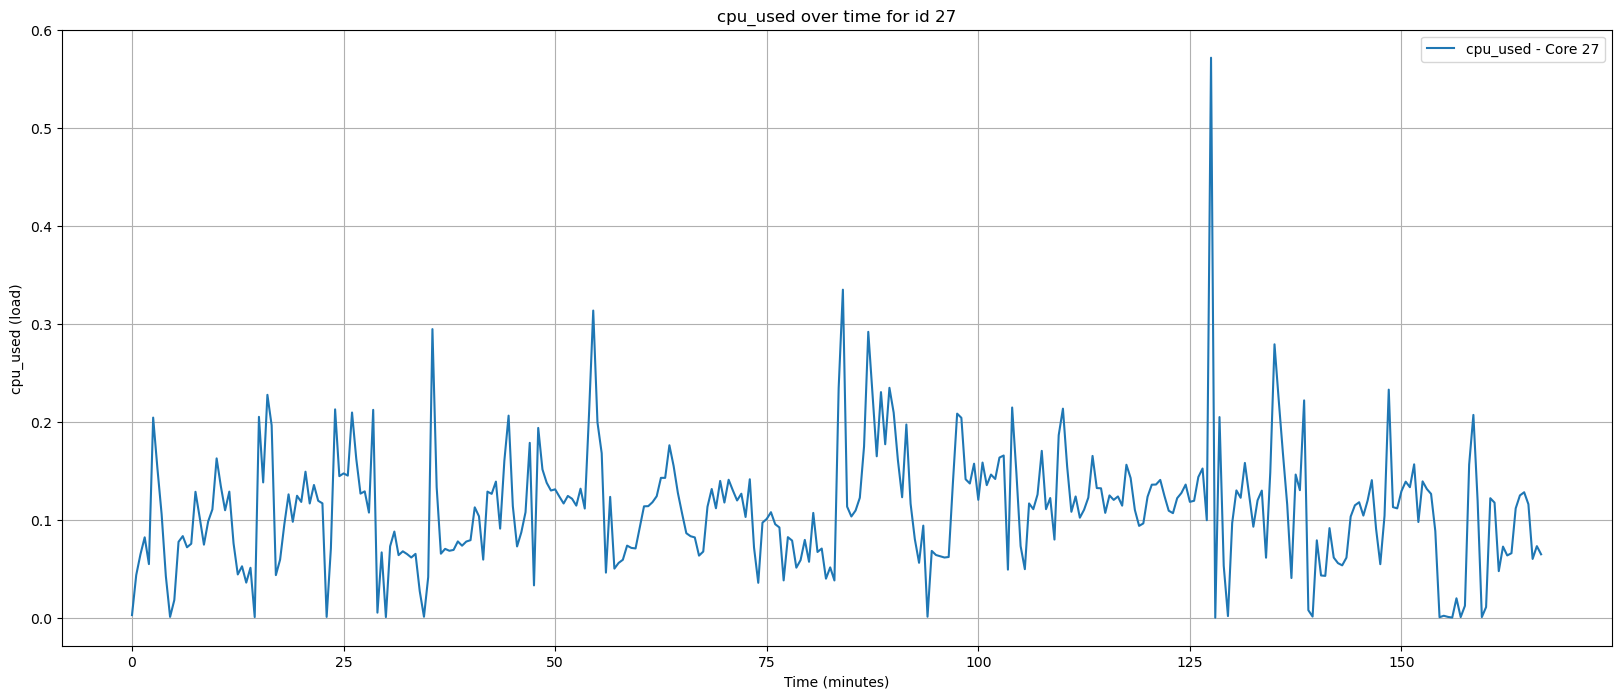

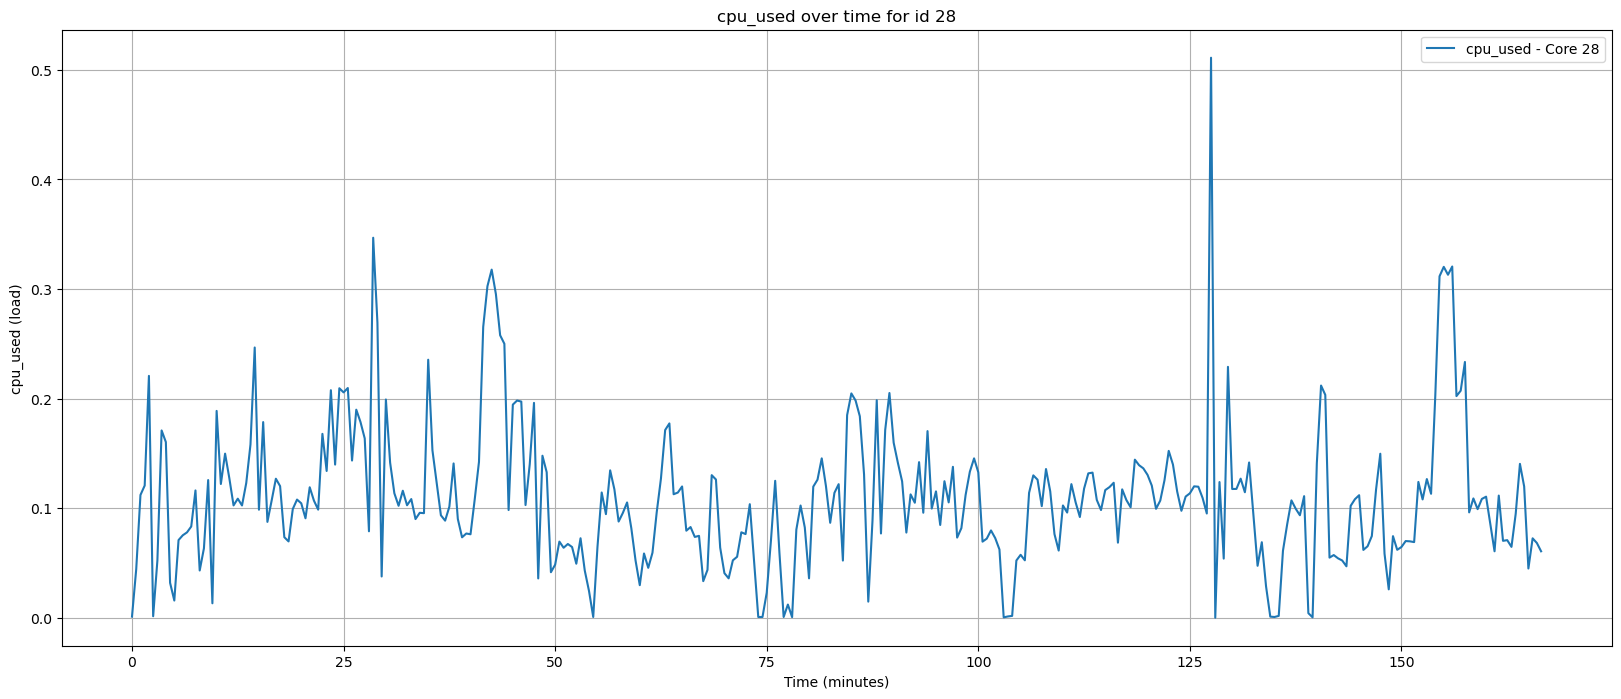

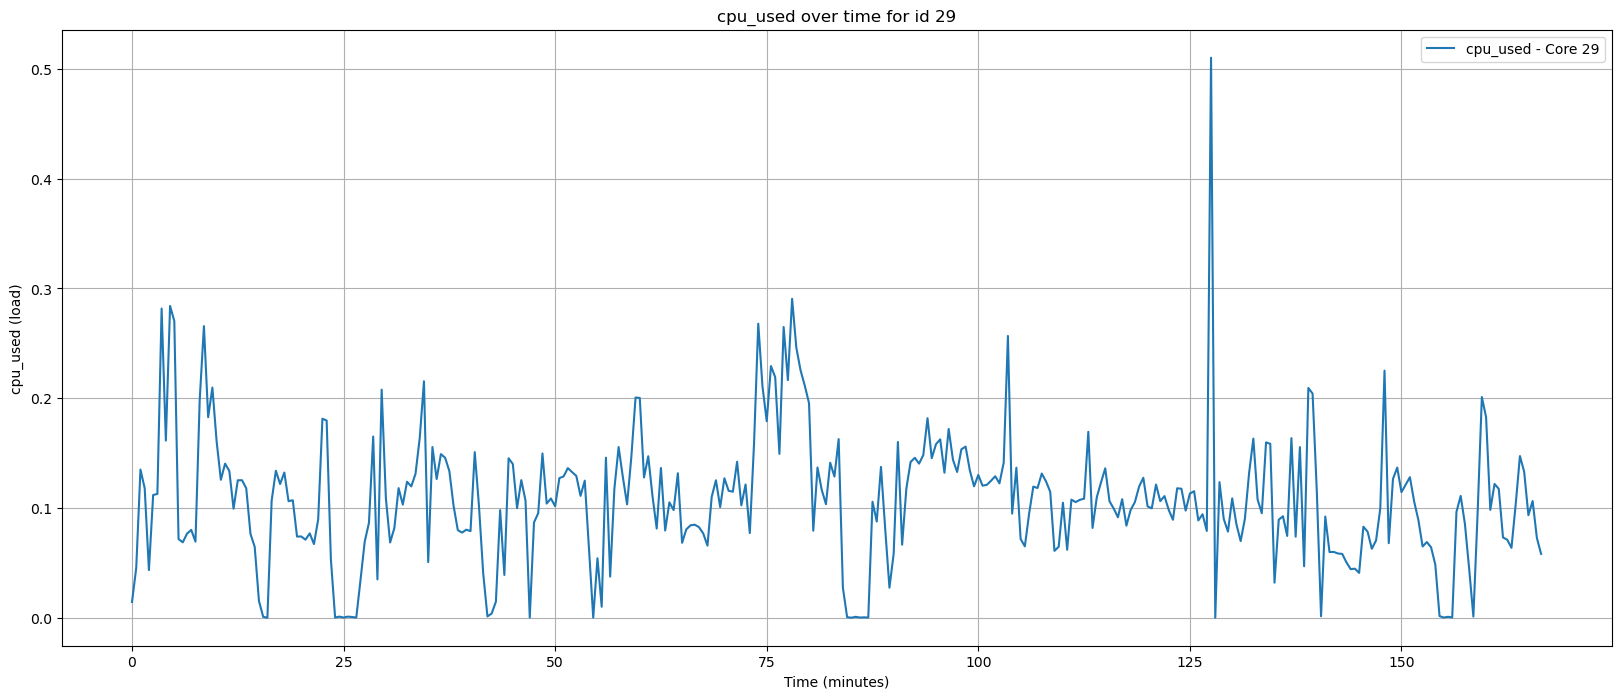

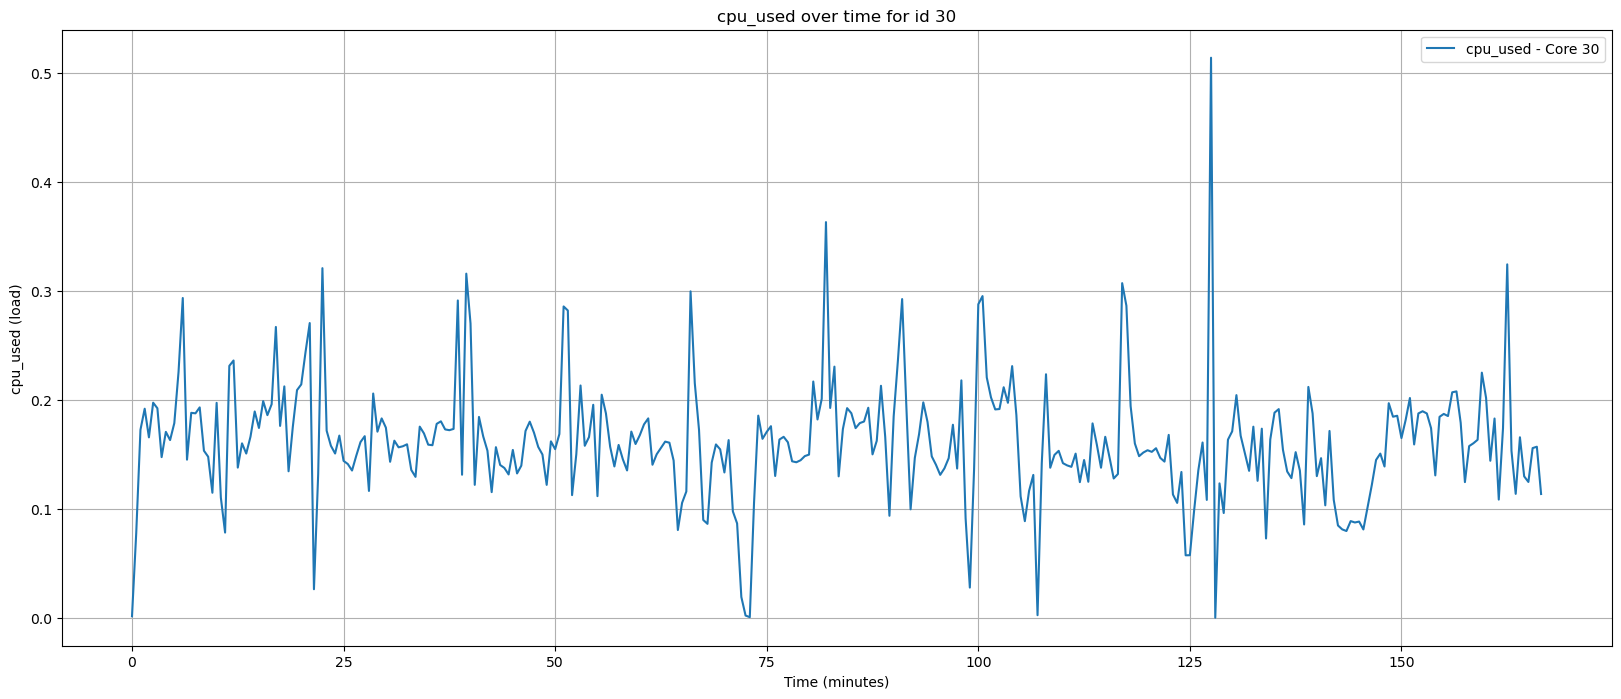

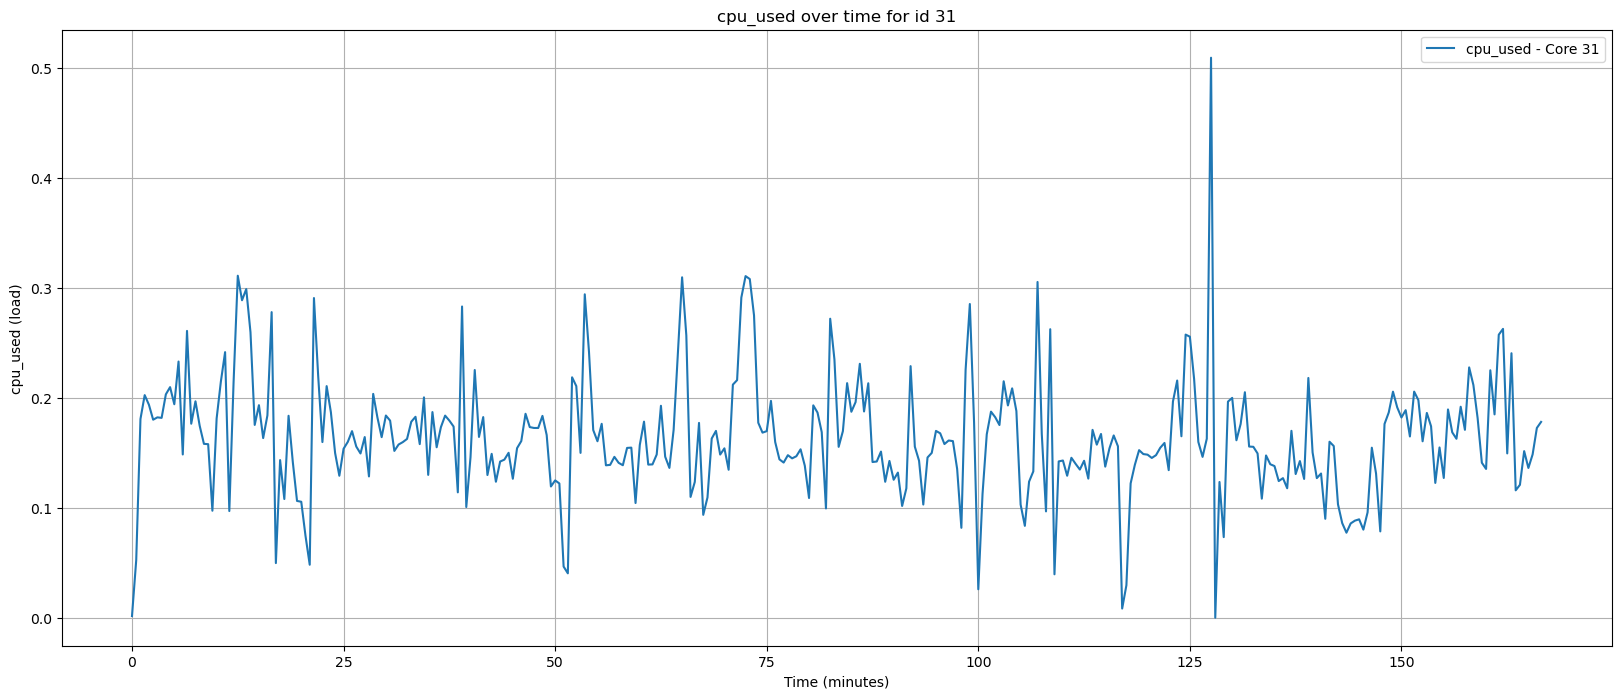

In [19]:
# Function to plot data for a specific metric and core/accelerator ID
def plot_metric(data, metric, target_id, time_unit="minutes"):
    # Ensure the metric exists in the JSON data
    if metric not in data:
        print(f"Metric '{metric}' not found in the data.")
        return

    # Get the relevant data for the metric
    metric_data = data[metric]
    timestep = int(metric_data["core"]["timestep"])  # Get timestep in seconds
    unit = metric_data["core"]["unit"]["base"]  # Confirm temperature unit (e.g., °C)

    
    # Find the series for the specified target_id
    series = None
    for entry in metric_data["core"]["series"]:
        if entry["id"] == target_id:
            series = entry
            break
    
    if series is None:
        print(f"No data found for ID {target_id} in metric '{metric}'.")
        return

    # Extract data and time points
    values = series["data"]
    time = np.arange(0, len(values) * timestep, timestep)

    # Convert time to minutes if needed
    if time_unit == "minutes":
        time = time / 60
        time_label = "Time (minutes)"
    else:
        time_label = "Time (seconds)"

    # Plotting
    plt.figure(figsize=(20, 8))
    plt.plot(time, values, linestyle='-', label=f"{metric} - Core {series['id']}")
    plt.xlabel("Time (minutes)")
    plt.ylabel(f"{metric} ({unit})")
    plt.title(f"{metric} over time for id {target_id}")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_metric(json_data, 'cpu_used', target_id="24")
plot_metric(json_data, 'cpu_used', target_id="25")
plot_metric(json_data, 'cpu_used', target_id="26")
plot_metric(json_data, 'cpu_used', target_id="27")
plot_metric(json_data, 'cpu_used', target_id="28")
plot_metric(json_data, 'cpu_used', target_id="29")
plot_metric(json_data, 'cpu_used', target_id="30")
plot_metric(json_data, 'cpu_used', target_id="31")
#plot_metric(json_data, 'acc_temp', target_id="4")
